# IMDB Data Analysis

This analysis is looking at a data set for movies.  Below are the steps that were taken to clean the data, check the quality of the data, and explore the data.  During the exploration process the use of visual representation will aid in answer the important questions like:

*Does the budget amount predict the average vote of a movie?*

*Does the old adage that you have to spend money to make money hold true for movies? If so, what is the optimal expenditure or does it not drop off?*

*Does the number of movies being released correlate to the state of the economy?*

In [1]:
# need to import a couple libaries to aid in working with this data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib inline to show graphs in line with the code in this jupter notebook.
% matplotlib inline

# reading the data set from the downloaded CSV file.
df_main = pd.read_csv('tmdb-movies.csv')

# validating that the data came in correctly and that
# the data was seperated by a comma and not a different charcter.
df_main.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09


The data above appears to have imported correctly with a comma as the separator.

Now it is time to find out exactly how the data is structed and what data is available.

This will reveal if or how much wrangling needs done before exploring the data set.

In [2]:
#checking how many movies have blank sections of data.
df_main.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [3]:
#determining what the data types are for the data that was just imported.
#int64 are whole numbers, float64 are decimels, and object are strings. 
df_main.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
#Getting descriptive statistics for numeric columns (floats and intergers) in the data set.
df_main.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Looking at the above outputs we can see a couple key points already.  The *relevant* columns for this analysis are in the **correct data type** for comparison, there is **no blanks** or gaps in the data, and the data shows some **interesting descriptive statistics**. 

For example, the data set covers a *range of 55 years’* worth of movie data with the first quartile of the movies covering a range of 35 years and the last quartile covering just 4 years. Meaning that roughly the *same number of movies* was made in the *first 35 years* of this data set as were made in the *last 4 years.* The data also shows that there are **movies with no runtime, budget, and movies with no revenue.** The data didn’t show any blanks for those columns but there might be zeros to hold the place value for missing data.  Further exploration will need to be done on those columns before making it to the next phase. 

In [5]:
#how many movies had zero filled in for a budget
df_main.query("budget == 0")['id'].count()

5696

In [6]:
#how many movies had zero filled in for runtime
df_main.query("runtime == 0")['id'].count()

31

In [7]:
#how many movies had zero filled in for all three columns and by what year did they 'release'
df_main.query("revenue == 0" and "budget == 0" and "runtime == 0").groupby(['release_year'])['id'].count()

release_year
2000    1
2002    2
2003    1
2005    2
2006    1
2008    1
2009    1
2010    2
2011    3
2012    2
2013    5
2014    3
2015    7
Name: id, dtype: int64

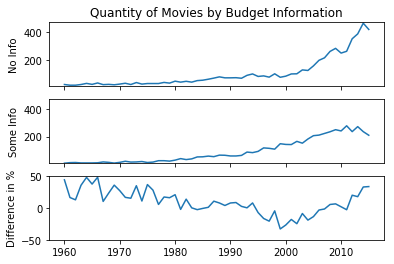

In [8]:
#plotting the history of movies with budget data vs those without and the % of change
#getting the data frame broken down to the desired buckets
zero_data = df_main.query("revenue == 0" and "budget == 0").groupby(['release_year'])['id'].count()
some_data = df_main.query("revenue != 0" and "budget != 0").groupby(['release_year'])['id'].count()
diff_data = zero_data - some_data
total_data = zero_data + some_data
diff_data_percent = diff_data / total_data * 100

#the first chart, the no budget movies
plt.subplot(3, 1, 1)
plt.plot(zero_data.index, zero_data)
plt.ylabel('No Info')
plt.xticks(zero_data.index[0::10],[])
plt.ylim(ymax = 470, ymin = 10)

plt.title('Quantity of Movies by Budget Information')

#the second chart, the movies with budget data
plt.subplot(3, 1, 2)
plt.plot(some_data.index, some_data)
plt.ylabel('Some Info')
plt.ylim(ymax = 470, ymin = 10)
plt.xticks(some_data.index[0::10],[])

#the thrid chart, the change percent between the two data frames
plt.subplot(3, 1, 3)
plt.plot(diff_data_percent.index, diff_data_percent)
plt.ylabel('Difference in %')
plt.ylim(ymax = 50, ymin = -50);

**What did we learn:** There are 5,700 movies with no budget information and 30 movies with no runtimes.  The movies with no runtime also have no budget nor revenue information. 

There is a notable number of movies without budget data. Speculation could be made that budget information wasn’t important or that it was harder to maintain records before the 90s.  Then the value of information was realized and the amount of information increased until we get to around 2010 when the sheer number of movies being produced reduces the ability to keep track of the data.  Once again, that is speculation and that portion of the data will be ignored when looking at questions related to budget as it is too great to fill in with the average. 

In [9]:
#creating the new data frame to explore the budget questions
df_budget = df_main.query("revenue != 0" and "budget != 0")

#selecting only the relavent columns for the given questions
df_budget = df_budget[['id', 'budget', 'revenue', 'original_title', 'vote_average', 'release_year']]
df_budget.head(4)

,id,budget,revenue,original_title,vote_average,release_year
0,135397,150000000,1513528810,Jurassic World,6.5,2015
1,76341,150000000,378436354,Mad Max: Fury Road,7.1,2015
2,262500,110000000,295238201,Insurgent,6.3,2015
3,140607,200000000,2068178225,Star Wars: The Force Awakens,7.5,2015


In [10]:
#descriptive statistics for the new data frame 
df_budget.describe()

,id,budget,revenue,vote_average,release_year
count,5170.000000,5.170000e+03,5.170000e+03,5170.000000,5170.000000
mean,45513.083366,3.073943e+07,8.027566e+07,6.032108,2001.252805
std,72723.324150,3.890065e+07,1.594749e+08,0.884156,11.775932
min,5.000000,1.000000e+00,0.000000e+00,1.500000,1960.000000
25%,8840.500000,6.000000e+06,0.000000e+00,5.500000,1996.000000
50%,13010.000000,1.700000e+07,2.100078e+07,6.100000,2005.000000
75%,44935.250000,4.000000e+07,8.942473e+07,6.600000,2010.000000
max,417859.000000,4.250000e+08,2.781506e+09,8.400000,2015.000000


**On to the first question:**
Does the budget amount provide a good indicator of how the movie will be voted?

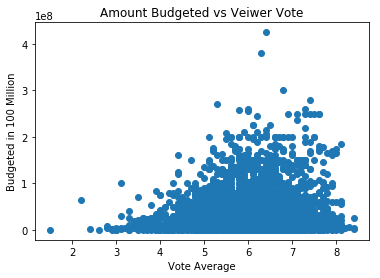

In [11]:
#Plot to show the correlation between budget and veiwer's votes
x = df_budget.vote_average
y = df_budget.budget
plt.scatter(x, y)
plt.ylabel("Budgeted in 100 Million")
plt.xlabel("Vote Average")
plt.title("Amount Budgeted vs Veiwer Vote");

Looking at the above scatter plot it appears that there isn't a strong correlation between the movie's budget and what the viewers vote.  Looking at just the chart above one could say that spending more money will help guarantee a none low rated movie, but it does not guarantee that the money had to have been spent to make it a high rated movie.  Note that the lowest budgeted movies have the highest and lowest rated movies.

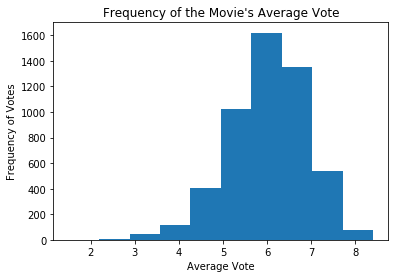

In [12]:
df_budget.vote_average.plot(kind = 'hist')
plt.ylabel("Frequency of Votes")
plt.xlabel("Average Vote")
plt.title("Frequency of the Movie's Average Vote");

In [13]:
#calculating the correlation coefficent
df_budget.budget.corr(df_budget.vote_average)

0.092006600073478925

This histograph shows that there is a normal distribution of votes across the movies.  That means there is a 68% chance that the movie will be rated between 5.2 and 6.9 regardless what was spent to make the movie.  Opening the range there is a 95% that movie would hit no higher than 7.8 and no lower than 4.3 on the average vote.  Furthermore, a very strong positive correlation would have a coefficent of 1 and no correlation would have a 0.  The results of 0.092 shows that it has a slight correlation but not one of note.   I feel that it is safe to say that the budget is not a good indicator of how the movie will be voted upon.  

*I used some of the descriptive statistics from a few cells up to help calculate those ranges.  The bins in the graph were not broken down far enough to know the tenths place.*

**On to the second question:** Does budget predict revenue?  Do you truly have to spend money to make money?

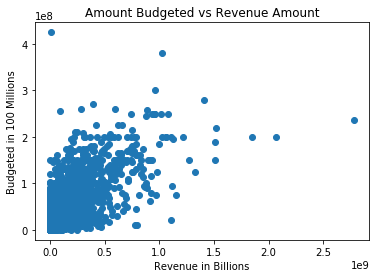

In [14]:
#Plot to show the correlation between budget and revenue
x = df_budget.revenue
y = df_budget.budget
plt.scatter(x, y)
plt.ylabel("Budgeted in 100 Millions")
plt.xlabel("Revenue in Billions")
plt.title("Amount Budgeted vs Revenue Amount");

In [15]:
#calculating the correlation coefficent
df_budget.budget.corr(df_budget.revenue)

0.70014677840306061

There is a strong correlation between the amount budgeted and the amount returned in revenue.  The hand full of outliers, the ones that show the nightmare and fantasy outcomes of the movie business, can distract from the general upward path that starts in the lower left-hand corner and works its way up to the right-hand corner.  

**On to the third question:** Does the number of movies being released correlate to the state of the economy?

To answer this question, I will need to reference more data.  This data comes from *www.bea.gov* and shows the economic health of the nation in terms of gross domestic product, GDP.  I downloaded it and saved it as *us_gdp_history.csv*

In [16]:
#importing the new data frame
df_gdp = pd.read_csv('us_gdp_history.csv')
df_gdp.head(2)

,year,nominal_gdp,real_gdp
0,1960,5.430000e+11,3.109000e+12
1,1961,5.630000e+11,3.188000e+12


In [17]:
#pulling out just the number of movies per year from the main data frame
df_year_qty = df_main.groupby(['release_year']).count().astype(float)
df_year_qty.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,,,,,,,,,,,,
1960,32.0,32.0,32.0,32.0,32.0,32.0,32.0,0.0,32.0,28.0,30.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0
1961,31.0,31.0,31.0,31.0,31.0,31.0,31.0,1.0,31.0,27.0,29.0,31.0,31.0,31.0,30.0,31.0,31.0,31.0,31.0,31.0


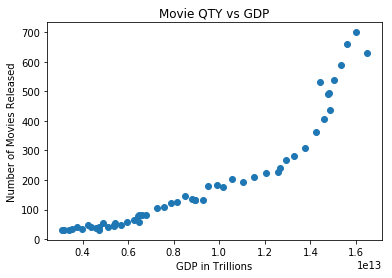

In [18]:
#Plot to show the correlation between gdp and movie qty
x = df_gdp.real_gdp
y = df_year_qty.id
plt.scatter(x, y)
plt.ylabel("Number of Movies Released")
plt.xlabel("GDP in Trillions")
plt.title("Movie QTY vs GDP");

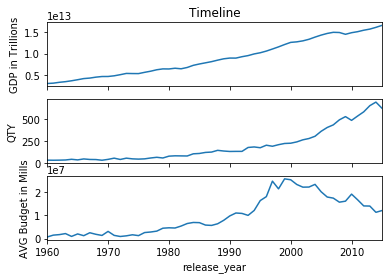

In [19]:
#exploring the timeline of the economic health and the average budget for a movie
df_year_mean = df_main.groupby(['release_year']).mean().astype(float)

plt.subplot(3,1,1)
df_gdp.real_gdp.plot()
plt.ylabel("GDP in Trillions")
plt.xticks(df_gdp.real_gdp.index[0::10], [])
plt.title("Timeline")

plt.subplot(3,1,2)
df_year_qty.id.plot()
plt.xticks(df_year_qty.id.index[0::10], [])
plt.ylabel("QTY")

plt.subplot(3,1,3)
df_year_mean.budget.plot()
plt.ylabel("AVG Budget in Mills");

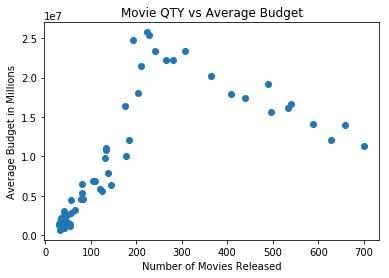

In [20]:
#Exploring the connection between average budget and qty of movies being released

y = df_year_mean.budget
x = df_year_qty.id
plt.scatter(x, y)
plt.xlabel("Number of Movies Released")
plt.ylabel("Average Budget in Millions")
plt.title("Movie QTY vs Average Budget");

There is a very strong 0.92 correlation coefficient that shows the number of movies being released per year is connected to the state of the economy.  


**In summary:**  The amount of money spent of a movie does not have a connection to how the movie will be voted upon, however, the amount budgeted does have a good connection to how much the movie will bring in.  Using one’s gut this finding feels correct.  
*Let’s imagine that you have only enough money for one of the two new movies that came out this week.  If a studio spent more money on movie “A” than movie “B” then you would probably decide to spend your money on movie “A” and if you are still interested in the “B” movie you might rent it when it comes out to DVD/Blu-ray.  This looks to be a sound bet, but it does not consider the quality of the movie.  The truth could be that movie “A” is filled with expensive talent that is coasting off their established name and the writers are recycling jokes that made money the last time all while movie “B” is using cheaper unestablished talent that is willing to give it all they have, just to make it on their ‘big break’ with writers that don’t care what sells, they think the script would be entertaining to them.*  

The above scenario is just a theory that can't be proven right nor wrong because the data isn’t there.  The data does not tell why a movie was rated the way it was.  If the data showed the rating for the overall movie then went deeper and gave a rating of the acting/characters of the movie, a rating of the special effects, and a rating of the storyline then at that point one might be able to uncovering the causation of the movie rating.  For now, all we have is the observation that out of the half of the movie data set that had budget data, the movies that spent more also made more and the public rated the movie with no correlation to how much was spent.  

How much was spent on movies in terms of how many movies were produced is strongly correlated to the economic health of the nation.  It would be easy to say that healthier the economy is the more movies will be released.  It even sounds logical, the more money that is being spent nation wide then the more money that will be spent on movies.  If that were true we then should be able to predict how many movies will be released in a given year with a significant change to the economy rather by a depression or major expansion.  Yet the data shows a trend that challenges that as a potential causation.  Up until the mid-90s the movie business had minimal increase over the previous year.  Then the average budget began to climb, peaking out around the turn of the century.  At that point; something had to have broken loose, cannot be positive what broke loose as the data does not tell, but whatever it was the average budget began to drop and the number of movies being released exponentially increased.  What broke loose could have been the cost to enter the movie business or the movie studios could have switched focus to quantity over quality, either way there is more to the number of movies a year than just the economic health. 
